In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math 
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, plot_confusion_matrix, classification_report, f1_score

In [55]:
data=pd.read_csv('Car_Evaluation_Data.csv')
data.columns = ['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'Safety', 'Decision']

In [56]:
data.head(10)

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,Safety,Decision
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med
2,unacc,vhigh,vhigh,2,2,small,high
3,unacc,vhigh,vhigh,2,2,med,low
4,unacc,vhigh,vhigh,2,2,med,med
5,unacc,vhigh,vhigh,2,2,med,high
6,unacc,vhigh,vhigh,2,2,big,low
7,unacc,vhigh,vhigh,2,2,big,med
8,unacc,vhigh,vhigh,2,2,big,high
9,unacc,vhigh,vhigh,2,4,small,low


In [57]:
print(str(len(data.index)) + " of cars in original data")

1728 of cars in original data


In [58]:
def show(data):
  for i in data.columns[1:]:
    print("Feature: {} with {} Levels".format(i,data[i].unique()))
show(data)

Feature: Maintenance Cost with ['vhigh' 'high' 'med' 'low'] Levels
Feature: Number of Doors with ['vhigh' 'high' 'med' 'low'] Levels
Feature: Capacity with ['2' '3' '4' '5more'] Levels
Feature: Size of Luggage Boot with ['2' '4' 'more'] Levels
Feature: Safety with ['small' 'med' 'big'] Levels
Feature: Decision with ['low' 'med' 'high'] Levels


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 1728 non-null   object
 1   Maintenance Cost      1728 non-null   object
 2   Number of Doors       1728 non-null   object
 3   Capacity              1728 non-null   object
 4   Size of Luggage Boot  1728 non-null   object
 5   Safety                1728 non-null   object
 6   Decision              1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [60]:
data.dtypes

Price                   object
Maintenance Cost        object
Number of Doors         object
Capacity                object
Size of Luggage Boot    object
Safety                  object
Decision                object
dtype: object

In [61]:
data.isnull().sum() 

Price                   0
Maintenance Cost        0
Number of Doors         0
Capacity                0
Size of Luggage Boot    0
Safety                  0
Decision                0
dtype: int64

In [103]:
%%HTML
<div class='tableauPlaceholder' id='viz1637670871760' style='position: relative'><noscript><a href='#'><img alt='Car Evaluation Exploratory Data Analysis ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAonCarEvaluation&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='EDAonCarEvaluation&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ED&#47;EDAonCarEvaluation&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1637670871760');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1677px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

<AxesSubplot:xlabel='Price', ylabel='count'>

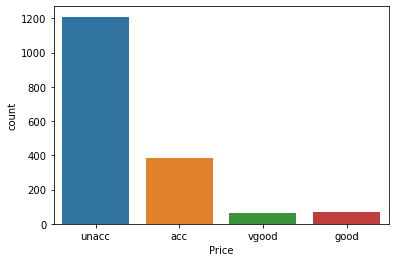

In [63]:
sns.countplot(x='Price', data=data)

<AxesSubplot:xlabel='Price', ylabel='count'>

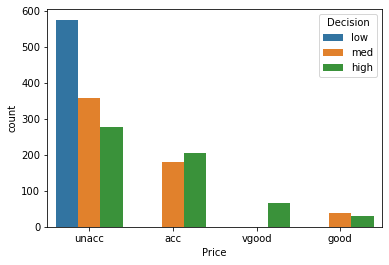

In [64]:
sns.countplot(x='Price', hue='Decision', data=data)

<AxesSubplot:xlabel='Price', ylabel='count'>

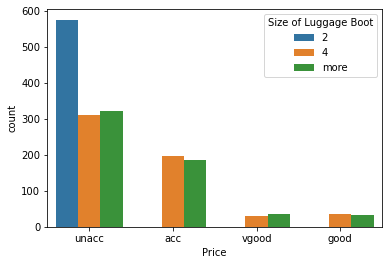

In [65]:
sns.countplot(x="Price", hue="Size of Luggage Boot", data=data)

<AxesSubplot:xlabel='Price', ylabel='count'>

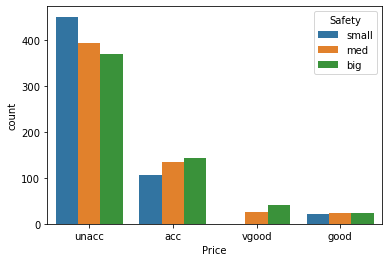

In [66]:
sns.countplot(x="Price", hue="Safety", data=data)

<AxesSubplot:xlabel='Price', ylabel='count'>

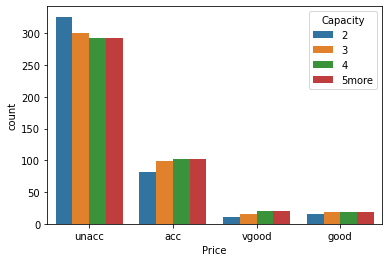

In [67]:
sns.countplot(x="Price", hue="Capacity", data=data)

In [68]:
encoder = ce.OrdinalEncoder(cols = ['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'Safety', 'Decision'])
data = encoder.fit_transform(data)
data.head(15)

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,Safety,Decision
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2
2,1,1,1,1,1,1,3
3,1,1,1,1,1,2,1
4,1,1,1,1,1,2,2
5,1,1,1,1,1,2,3
6,1,1,1,1,1,3,1
7,1,1,1,1,1,3,2
8,1,1,1,1,1,3,3
9,1,1,1,1,2,1,1


In [91]:
x = data.drop(['Price'], axis = 1)
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
print("X_train: {}".format(x_train.shape))
print("X_test: {}".format(x_test.shape))
print("Y_train: {}".format(y_train.shape))
print("Y_test: {}".format(y_test.shape))

X_train: (1209, 6)
X_test: (519, 6)
Y_train: (1209,)
Y_test: (519,)


In [92]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # Recall 
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")

In [102]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=48)

# fit the model
clf_en.fit(x_train, y_train)

yp_train = clf_en.predict(x_train)
yp_test = clf_en.predict(x_test)

evaluation_parametrics(y_train,yp_train,y_test,yp_test)

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

           1       0.98      0.92      0.94       852
           2       0.73      0.77      0.75       266
           3       0.00      0.00      0.00        41
           4       0.39      1.00      0.56        50

    accuracy                           0.86      1209
   macro avg       0.52      0.67      0.56      1209
weighted avg       0.86      0.86      0.85      1209

Classification Report for Test Data
              precision    recall  f1-score   support

           1       0.95      0.94      0.94       358
           2       0.76      0.68      0.72       118
           3       0.00      0.00      0.00        24
           4       0.30      1.00      0.46        19

    accuracy                           0.84       519
   macro avg       0.50      0.65      0.53       519
weighted avg       0.84      0.84    

C:\Users\LEGION\miniconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\miniconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\miniconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\minico

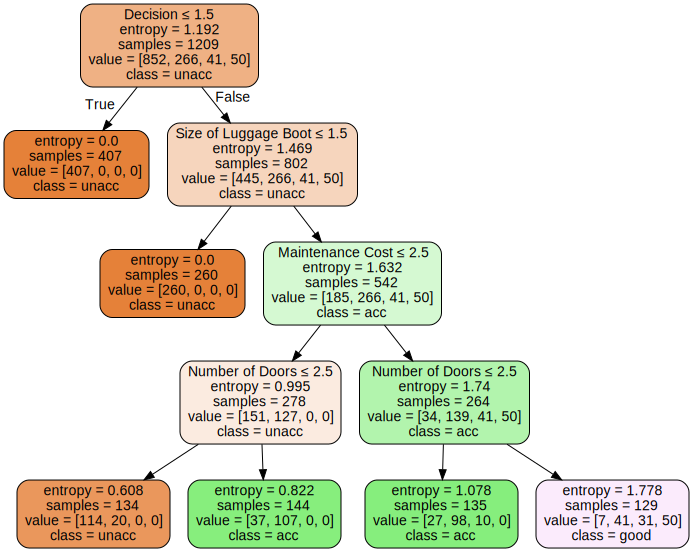

In [94]:
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=['unacc', 'acc', 'vgood', 'good'],  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("entropy.jpg")
graph 

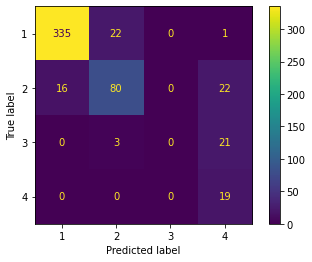

In [95]:
plot_confusion_matrix(clf_en, x_test, y_test)